In [1]:
from functions import *

In [2]:
#import the data 
df = pd.read_csv('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/pump-sensor-data/sensor.csv',sep=',')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [4]:
df1=imputation(df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220320 entries, 2018-04-01 00:00:00 to 2018-08-31 23:59:00
Freq: T
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sensor_00       210112 non-null  float64
 1   sensor_01       219951 non-null  float64
 2   sensor_02       220301 non-null  float64
 3   sensor_03       220301 non-null  float64
 4   sensor_04       220301 non-null  float64
 5   sensor_05       220301 non-null  float64
 6   sensor_06       215522 non-null  float64
 7   sensor_07       214869 non-null  float64
 8   sensor_08       215213 non-null  float64
 9   sensor_09       215725 non-null  float64
 10  sensor_10       220301 non-null  float64
 11  sensor_11       220301 non-null  float64
 12  sensor_12       220301 non-null  float64
 13  sensor_13       220301 non-null  float64
 14  sensor_14       220299 non-null  float64
 15  sensor_15       0 non-null       float64
 16  sensor_16     

/home/nico_ronzo/Pandas-InfluxDB/functions.py:73: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1 = data.fillna(data.median())


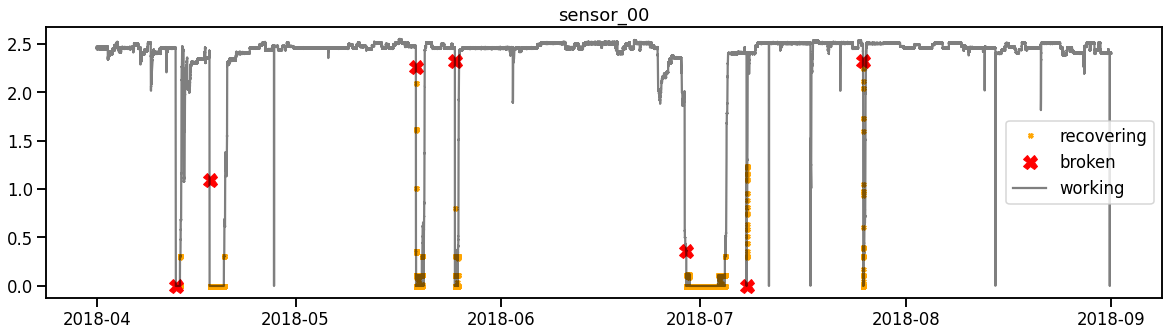

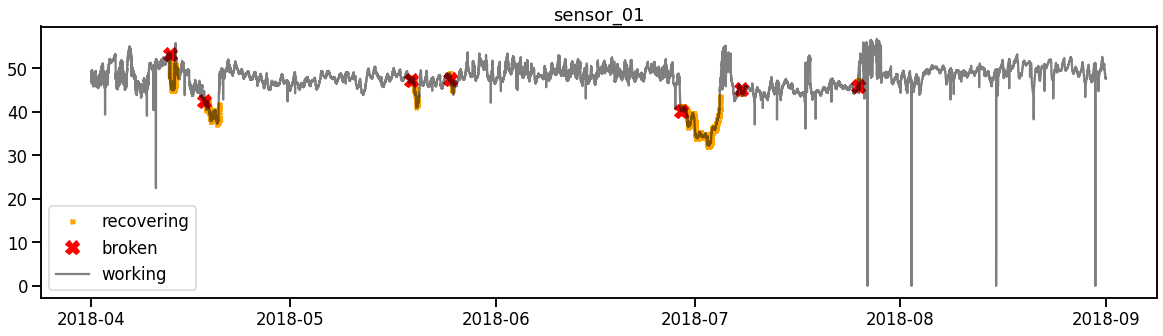

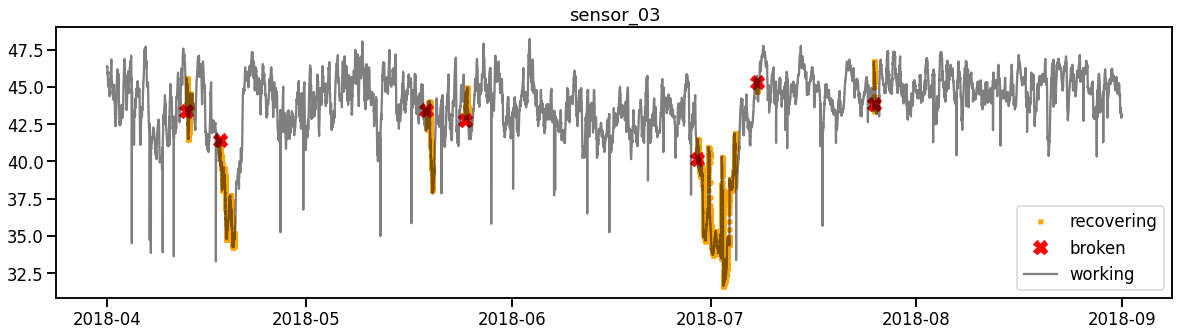

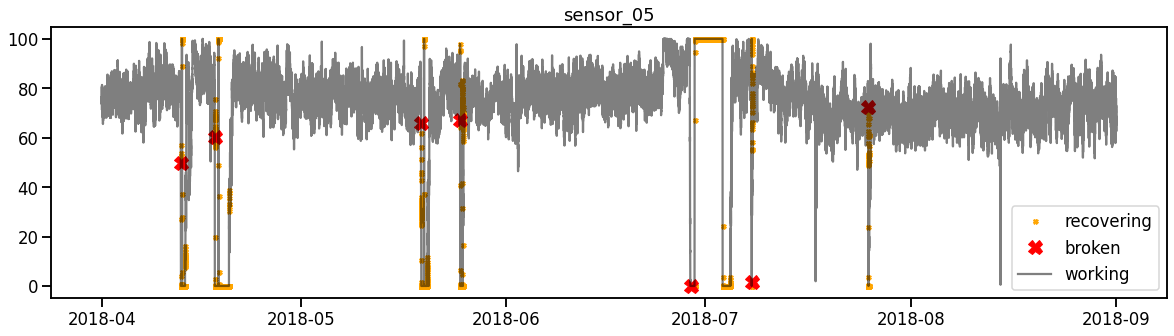

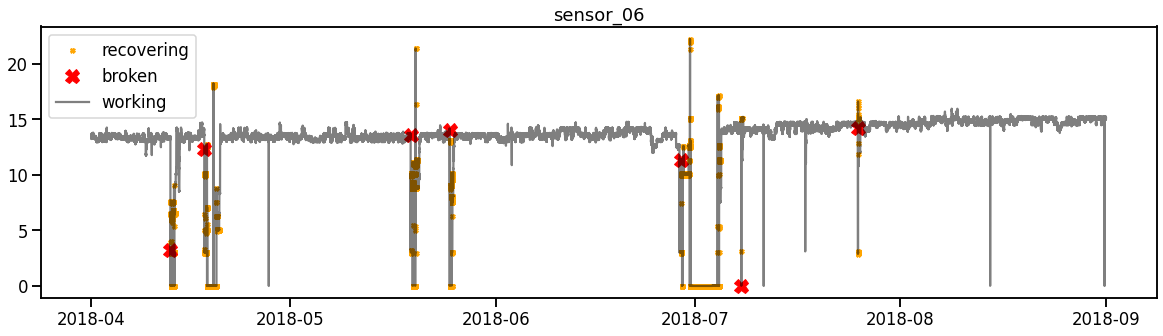

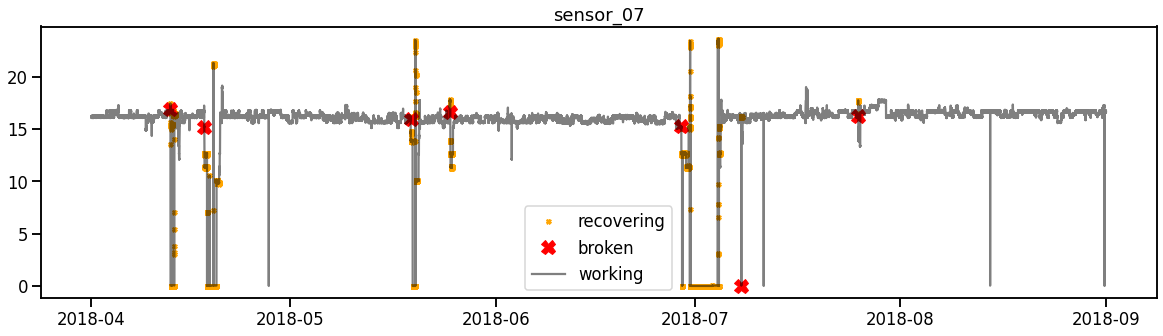

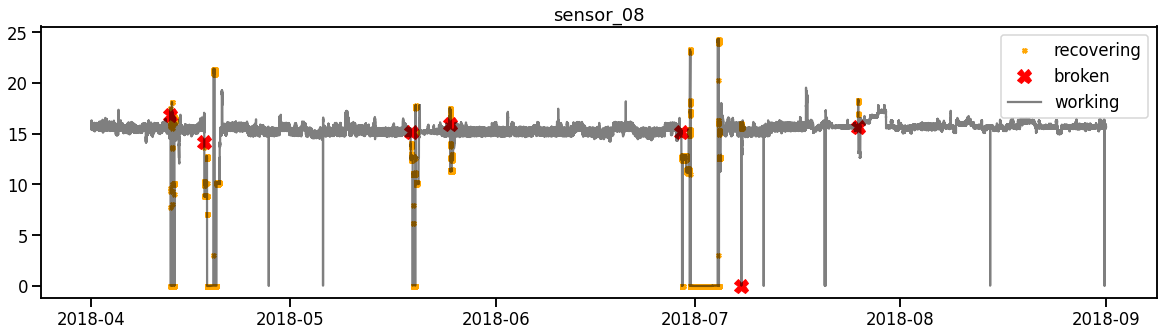

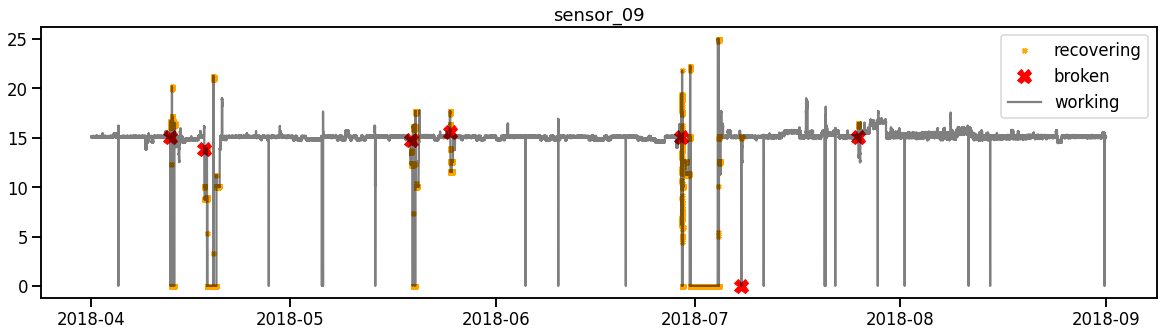

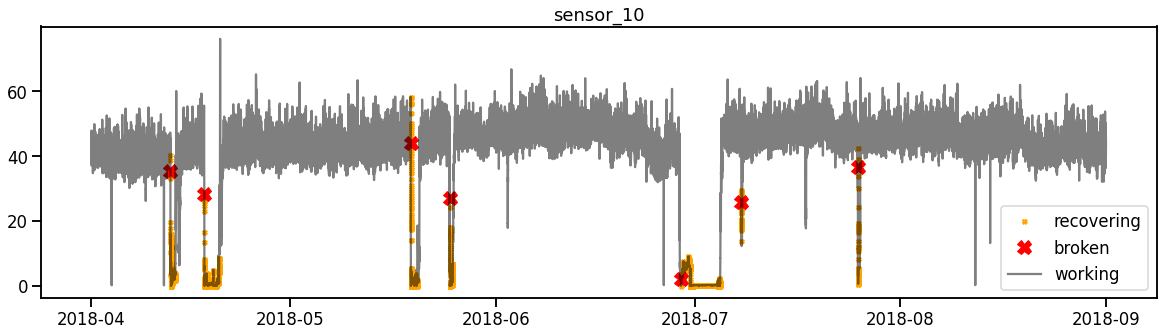

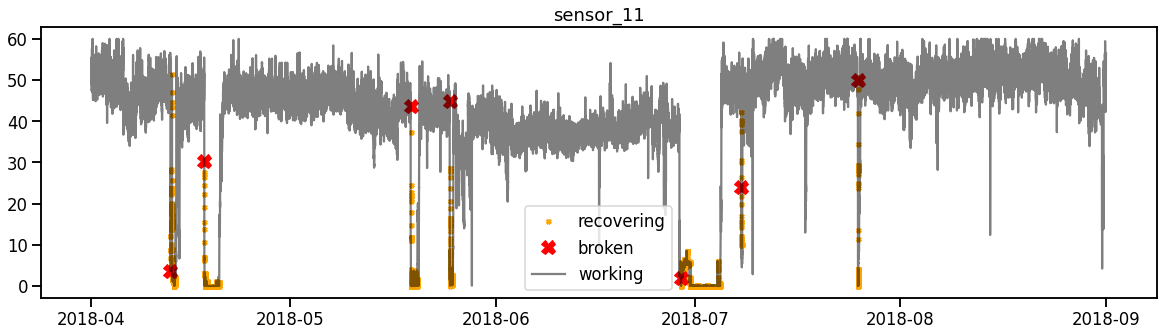

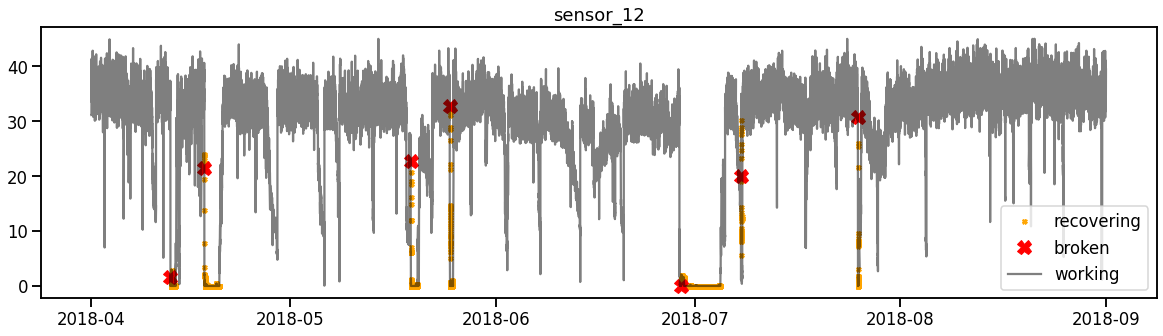

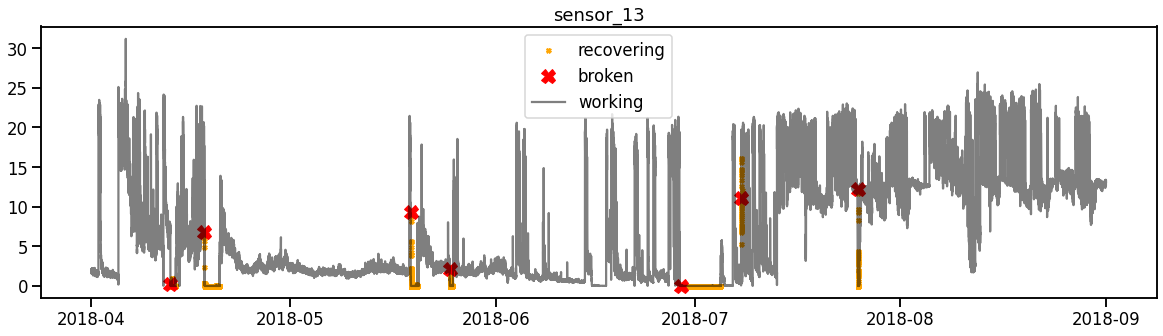

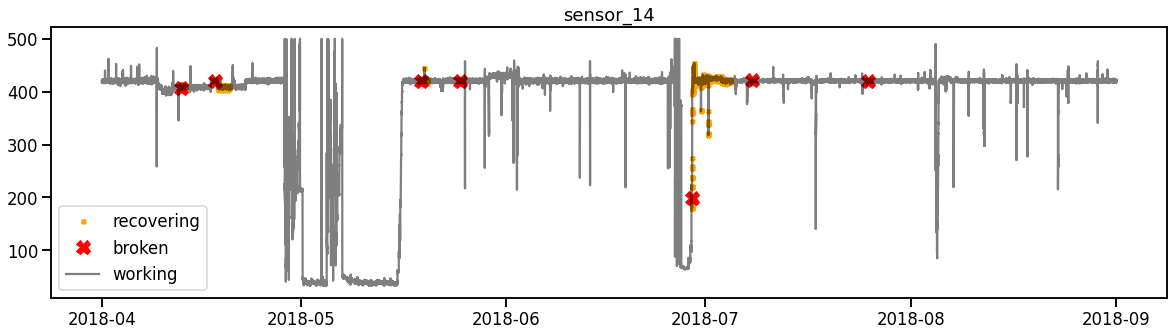

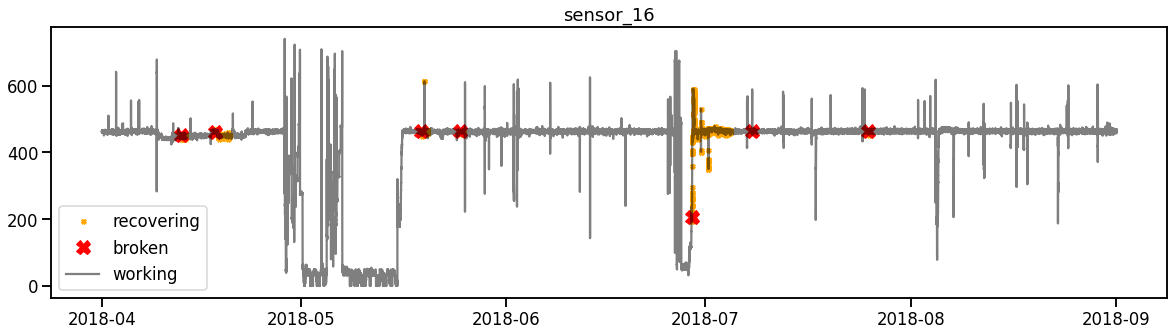

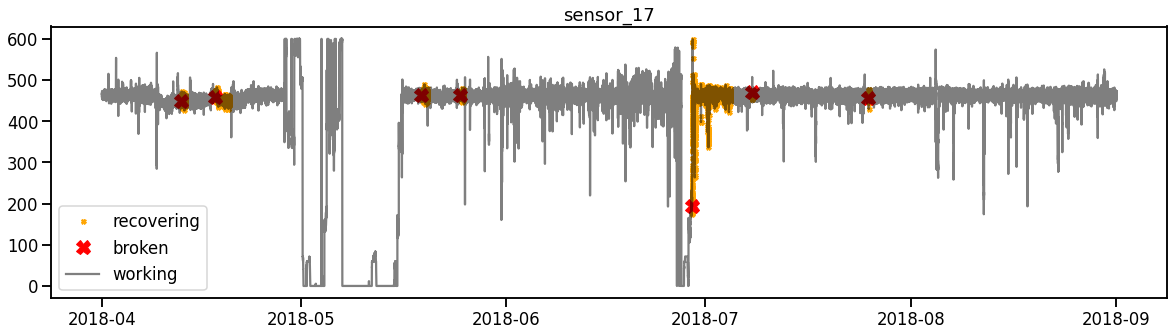

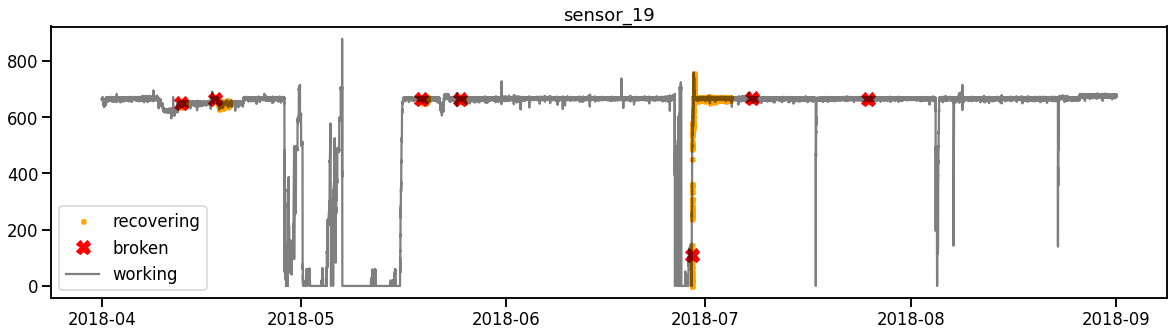

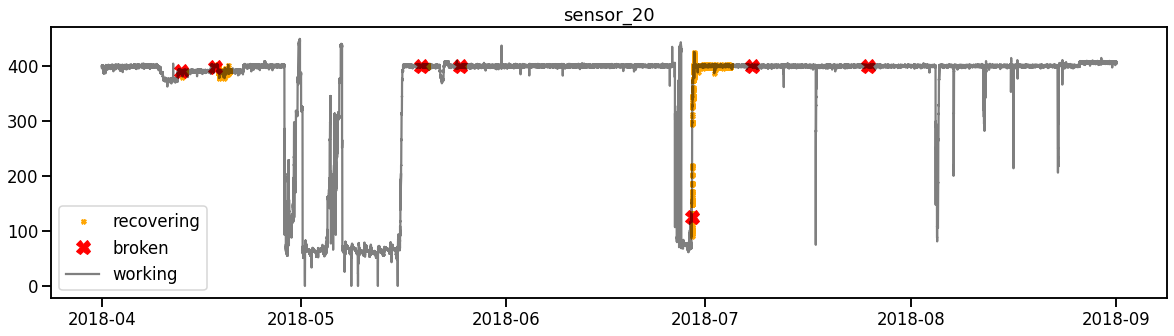

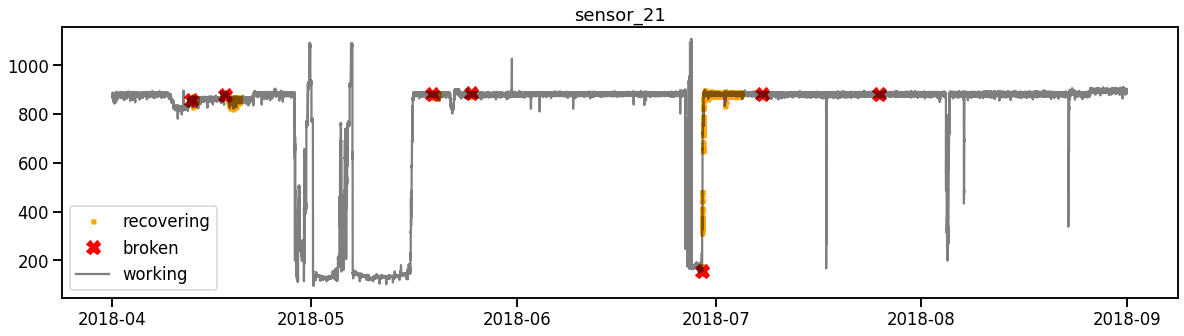

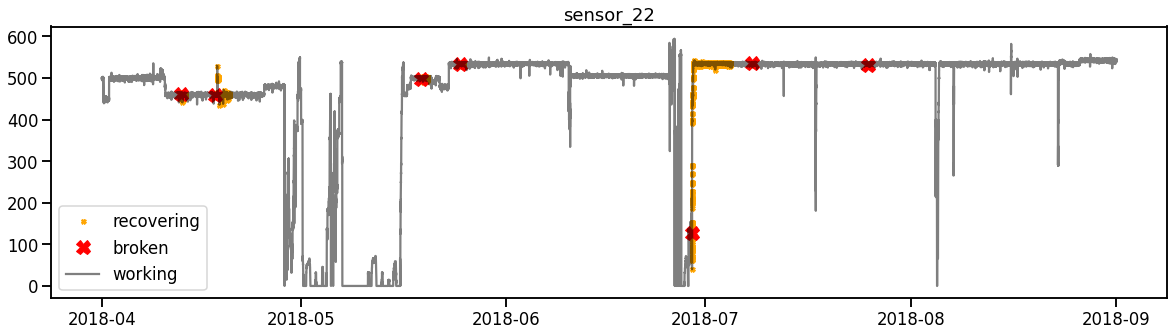

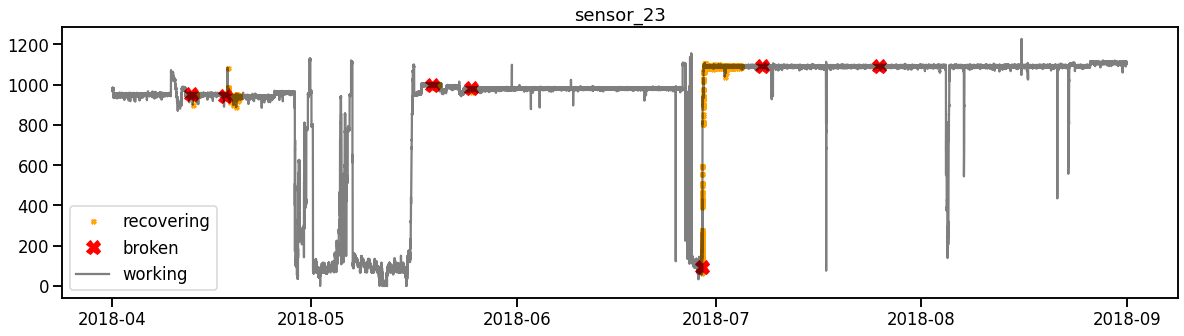

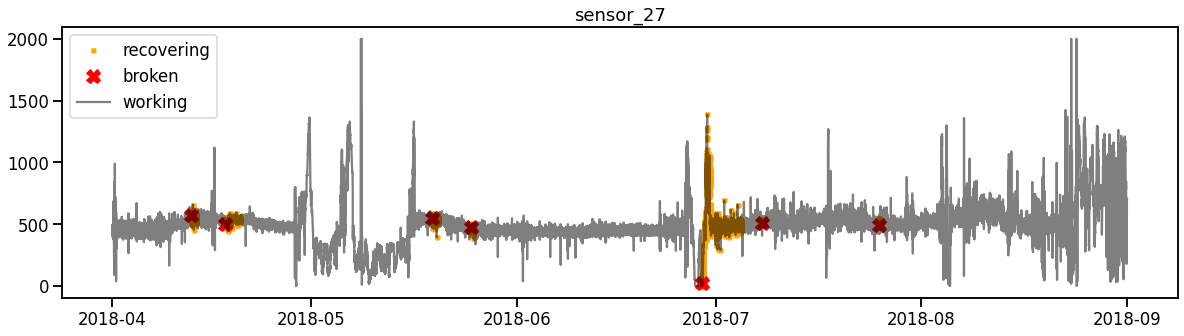

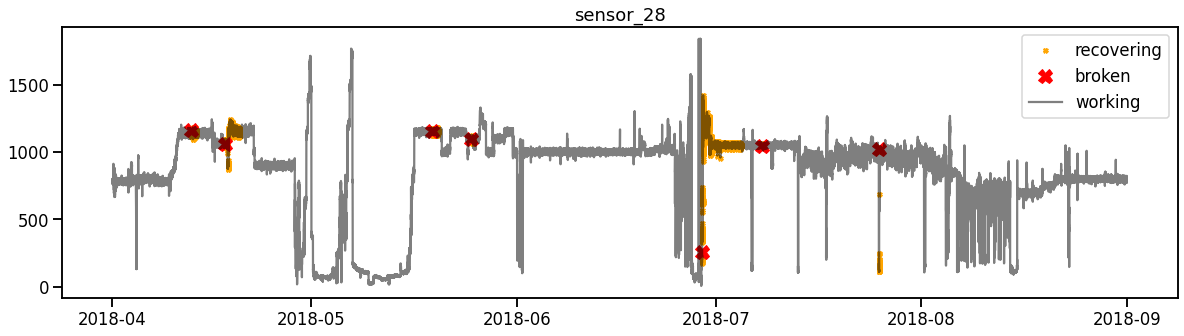

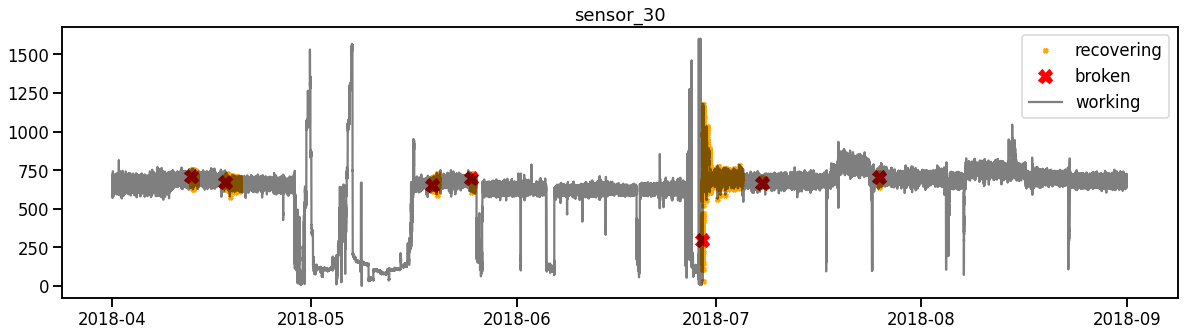

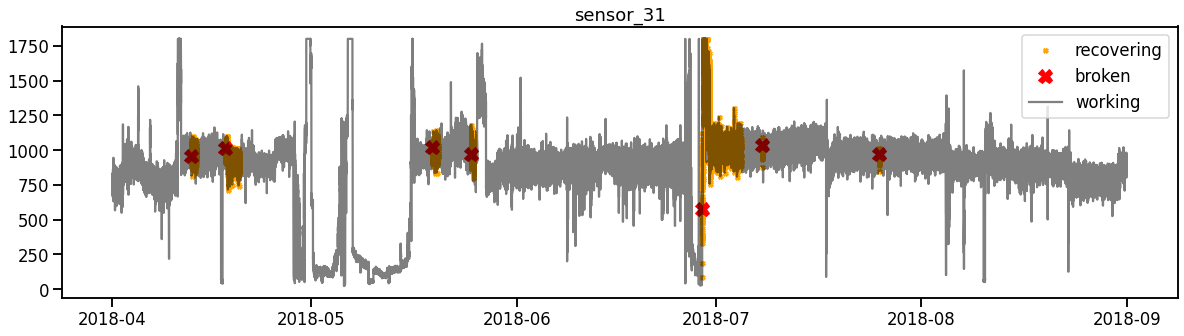

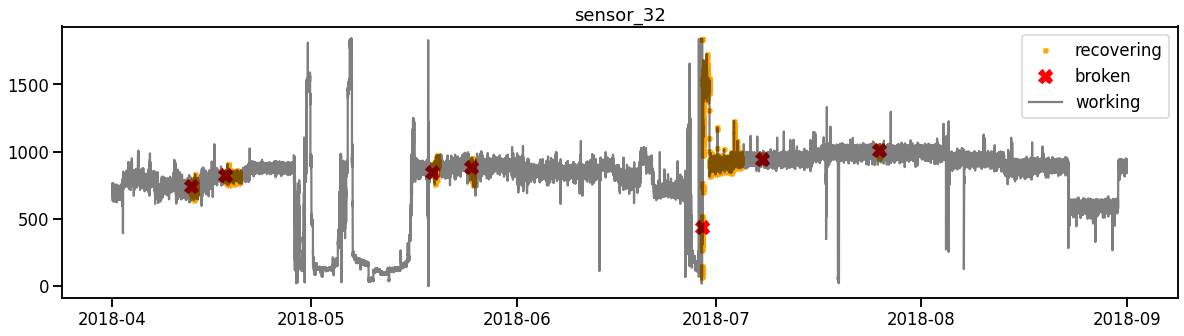

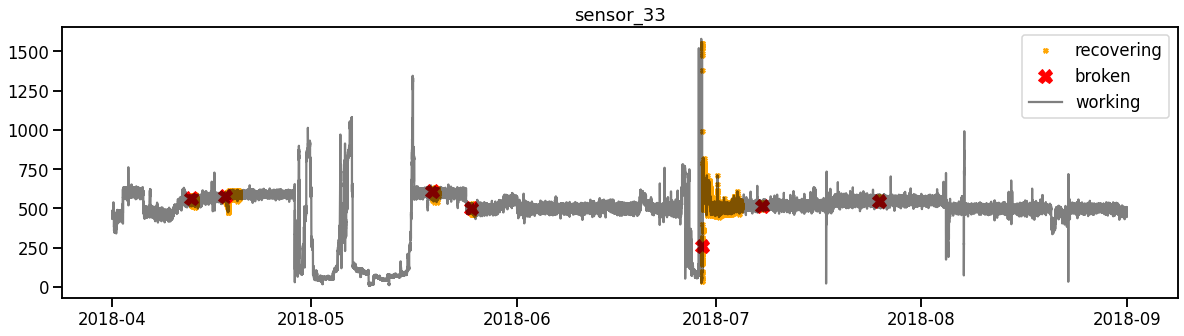

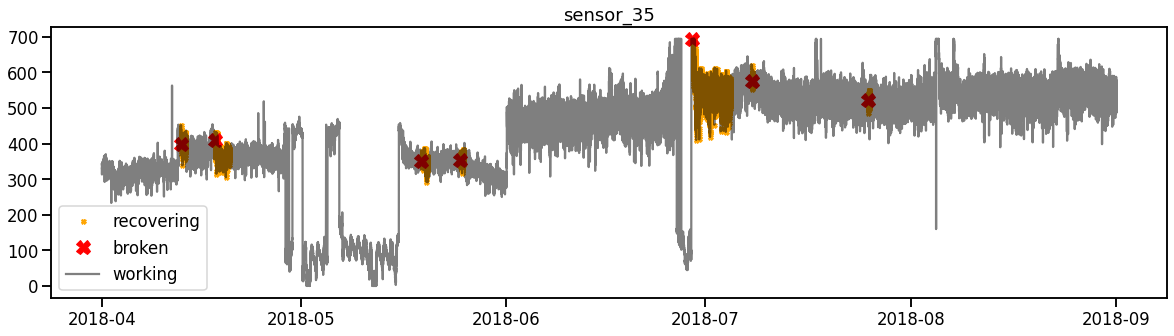

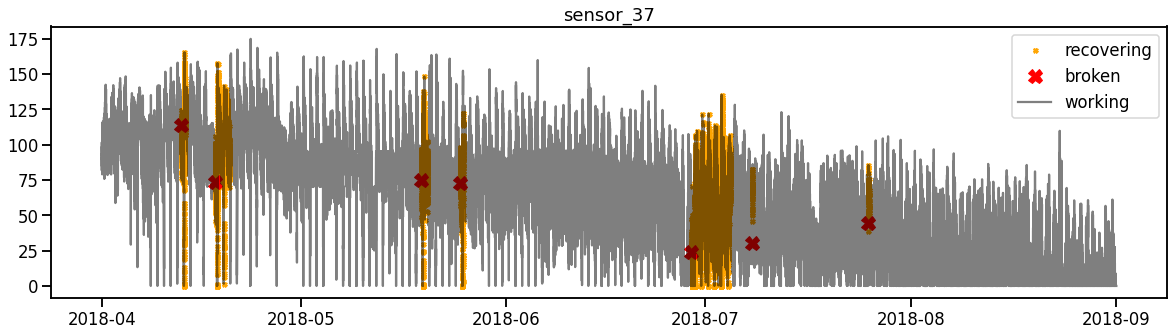

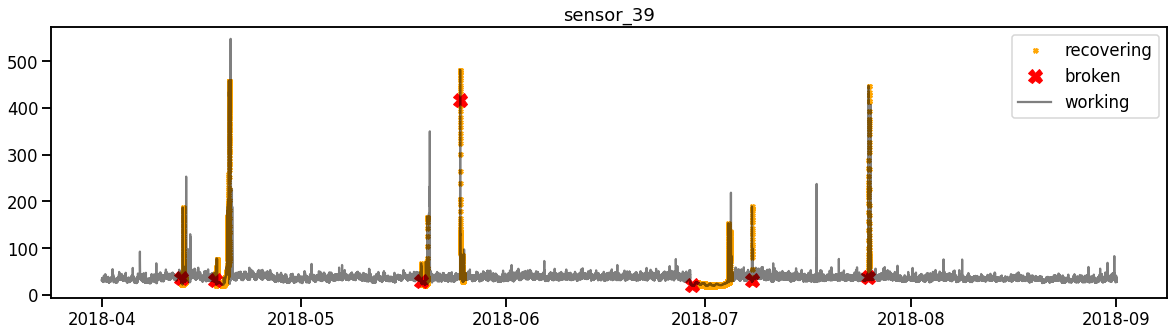

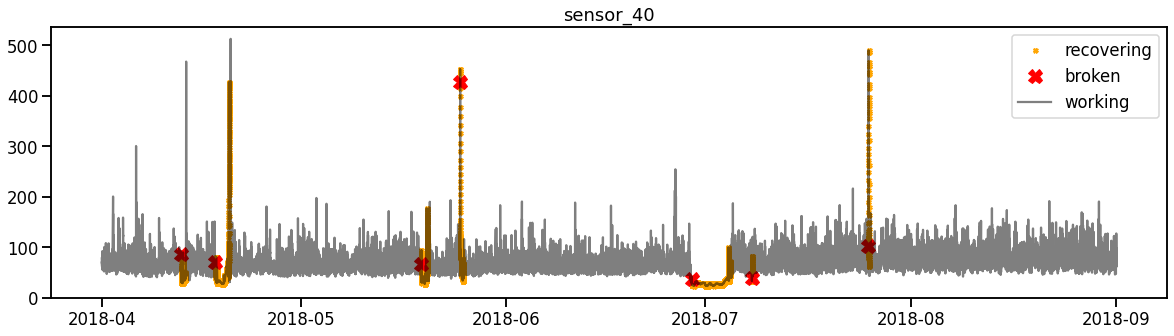

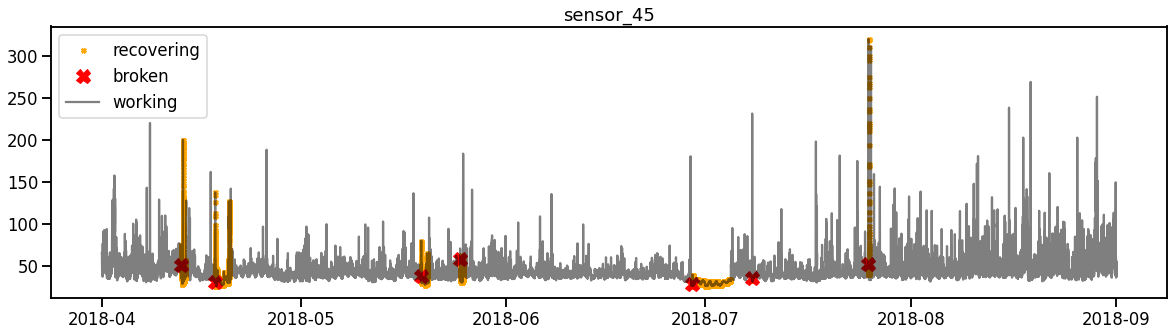

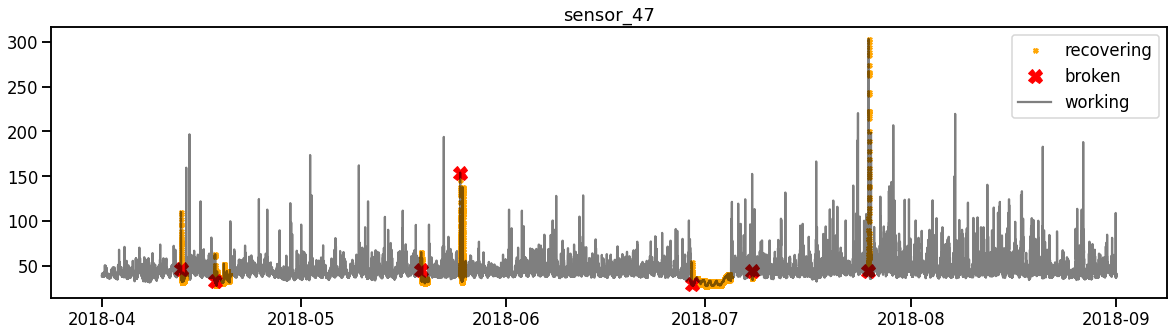

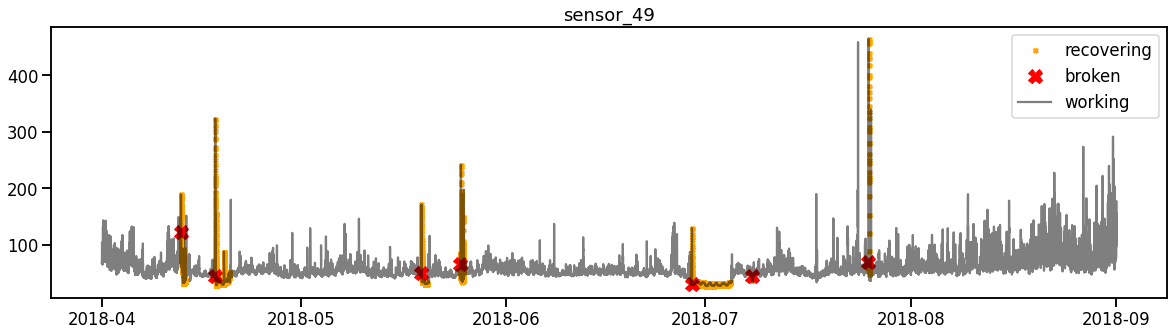

In [5]:
# sensor data with machine status
Broken = df1[df1['machine_status']=='BROKEN']
Recovery = df1[df1['machine_status']=='RECOVERING']
Sensors = df1.iloc[:,0:50]
sensorNames=Sensors.columns
for sensor in sensorNames:
    sns.set_context('talk')
    _ = plt.figure(figsize=(20,5))
    _ = plt.plot(Recovery[sensor], linestyle='none', marker='X', color='orange', markersize=5, label='recovering')
    _ = plt.plot(Broken[sensor], linestyle='none', marker='X', color='red', markersize=14, label='broken')
    _ = plt.plot(df1[sensor], color='black', label='working',alpha=0.5)
    _ = plt.title(sensor)
    _ =plt.legend()
    plt.show()
    
    

In [21]:
df1.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
timestamp                                                                    
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
timestamp                                                                    
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_41  sensor_42  sensor_43  sensor_44  \
timestamp            ...                                               
2018-04-01 00:00:00  ...   30.98958  31.770832   41.92708  39.641200   
2018-04-01 00:01:00  ...   30.98958  31.770832   41.92708  39.641200   
2018-04-01 00:02:00  ...   30.46875  31.770830   41.66666  39.351852   
2018-04-01 00:03:00  ...   30.46875  31.510420   40.88541  39.062500   
2018-04-01 00:04:00  ...   30.98958  31.510420   41.40625  38.773150   

                     sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
timestamp                                                                    
2018-04-01 00:00:00   65.68287   50.92593  38.194440   157.9861   67.70834   
2018-04-01 00:01:00   65.68287   50.92593  38.194440   157.9861   67.70834   
2018-04-01 00:02:00   65.39352   51.21528  38.194443   155.9606   67.12963   
2018-04-01 00:03:00   64.81481   51.21528  38.194440   155.9606   66.84028   
2018-04-01 00:04:00   65.10416   51.79398  38.773150   158.2755   66.55093   

                     machine_status  
timestamp                            
2018-04-01 00:00:00          NORMAL  
2018-04-01 00:01:00          NORMAL  
2018-04-01 00:02:00          NORMAL  
2018-04-01 00:03:00          NORMAL  
2018-04-01 00:04:00          NORMAL  

[5 rows x 50 columns]

In [23]:
ground_truth1 = df1['machine_status'].copy()
ground_truth2=pd.DataFrame(ground_truth1)
ground_truth2= ground_truth2[ground_truth2.machine_status != 'NORMAL']
ground_truth2= ground_truth2[ground_truth2.machine_status != 'BROKEN']
ground_truth2["machine_status"].replace({"RECOVERING": 1}, inplace=True)
ground_truth3=ground_truth2.squeeze()

In [24]:
res3=ground_truth(2,ground_truth3)

In [25]:
res1=pd.Series(data=None,index=pd.date_range(start='4/1/2018', end='4/12/2018',freq='12h'))
res2=pd.Series(data=None,index=pd.date_range(start='7/26/2018', end='8/31/2018 12:00:00',freq='12h'))

/tmp/ipykernel_301/2823863071.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res1=pd.Series(data=None,index=pd.date_range(start='4/1/2018', end='4/12/2018',freq='12h'))
/tmp/ipykernel_301/2823863071.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res2=pd.Series(data=None,index=pd.date_range(start='7/26/2018', end='8/31/2018 12:00:00',freq='12h'))


In [26]:
# concatenate the three series, lenght 153 days 
ground_truth=pd.concat([res1,res3,res2])

In [27]:
len(ground_truth)

306

In [28]:
true_label=ground_truth.fillna(value=0)

In [29]:
# fill missing values with 0.5 for calplot visualization 
ground_truth=ground_truth.fillna(value=0.5)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 900x122.4 with 2 Axes>,
 array([<AxesSubplot:ylabel='2018'>], dtype=object))

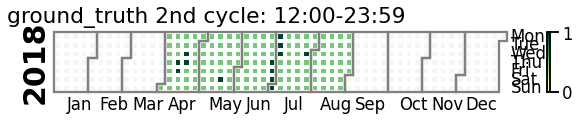

In [30]:
calplot.calplot(ground_truth.between_time(between(2)[0],between(2)[1]),yearlabel_kws={'color': 'black'}, cmap='YlGn', suptitle='ground_truth 1st cycle: 00:00-11:59', linewidth=2.3,dropzero=True,vmin=0) 
calplot.calplot(ground_truth.between_time(between(2)[2],between(2)[3]),yearlabel_kws={'color': 'black'}, cmap='YlGn', suptitle='ground_truth 2nd cycle: 12:00-23:59', linewidth=2.3,dropzero=True,vmin=0)

In [39]:
# clustering--> soft-dtw
# clustering_euclidean
#clustering_dtw
# EXPERIMENT:
# initialization of the list 
#adjusted rand index
ARI=[]
#precision
Precision=[]
#recall
Recall=[]
# f1-score
F1=[]
# number of periods inside 1st cluster
len_1=[]
# number of periods inside 2nd cluster 
len_2=[]
for i in range(49):
    #print(datetime.datetime.now())
    result=clustering(df1.iloc[:,i],131040/220320,720,2,'1min')
    print(result[5])
    len_1.append(len(result[3]))
    len_2.append(len(result[4]))
    print('ARI:',adjusted_rand_score(true_label.values.astype(int)[-len(result[1]):], result[1]))
    ARI.append(adjusted_rand_score(true_label.values.astype(int)[-len(result[1]):], result[1]))
    print('Precision:',precision_score(true_label.values.astype(int)[-len(result[1]):], result[1]))
    Precision.append(precision_score(true_label.values.astype(int)[-len(result[1]):], result[1]))
    print('Recall:',recall_score(true_label.values.astype(int)[-len(result[1]):], result[1]))
    Recall.append(recall_score(true_label.values.astype(int)[-len(result[1]):], result[1]))
    print('F1-score:',f1_score(true_label.values.astype(int)[-len(result[1]):], result[1]))
    F1.append(f1_score(true_label.values.astype(int)[-len(result[1]):], result[1]))


sensor_00
ARI: 0.9340680056934999
Precision: 1.0
Recall: 0.9
F1-score: 0.9473684210526316
sensor_01
ARI: 0.013551304005026302
Precision: 0.0
Recall: 0.0
F1-score: 0.0
sensor_02
ARI: 0.34295980968149614
Precision: 0.34782608695652173
Recall: 0.8
F1-score: 0.48484848484848486
sensor_03
ARI: 0.457528942815551
Precision: 0.4444444444444444
Recall: 0.8
F1-score: 0.5714285714285714
sensor_04
ARI: 0.9340680056934999
Precision: 1.0
Recall: 0.9
F1-score: 0.9473684210526316
sensor_05
ARI: 0.4126806264821231
Precision: 1.0
Recall: 0.3
F1-score: 0.4615384615384615
sensor_06
ARI: 0.8637289589364211
Precision: 1.0
Recall: 0.8
F1-score: 0.888888888888889
sensor_07
ARI: 0.7882317139501227
Precision: 1.0
Recall: 0.7
F1-score: 0.8235294117647058
sensor_08
ARI: 0.7882317139501227
Precision: 1.0
Recall: 0.7
F1-score: 0.8235294117647058
sensor_09
ARI: 0.7882317139501227
Precision: 1.0
Recall: 0.7
F1-score: 0.8235294117647058
sensor_10
ARI: 0.6988986103136331
Precision: 0.625
Recall: 1.0
F1-score: 0.7692307

/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_16
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_17
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_18
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_19
ARI: -0.013679530686870282
Precision: 0.0
Recall: 0.0
F1-score: 0.0
sensor_20
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_21
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_22
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_23
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_24
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_25
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_26
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_27
ARI: -0.08128801735505552
Precision: 0.0
Recall: 0.0
F1-score: 0.0
sensor_28
ARI: -0.0091091933498748
Precision: 0.0
Recall: 0.0
F1-score: 0.0
sensor_29
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_30
ARI: -0.08263049552485367
Precision: 0.0
Recall: 0.0
F1-score: 0.0
sensor_31
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_32
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_33
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_34
ARI: -0.047498041076518206
Precision: 0.03571428571428571
Recall: 0.1
F1-score: 0.05263157894736841
sensor_35
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_36
ARI: -0.013679530686870282
Precision: 0.0
Recall: 0.0
F1-score: 0.0
sensor_37
ARI: -0.013679530686870282
Precision: 0.0
Recall: 0.0
F1-score: 0.0
sensor_38
ARI: 0.02495692972745005
Precision: 0.1111111111111111
Recall: 0.1
F1-score: 0.10526315789473685
sensor_39
ARI: 0.1559466498303212
Precision: 1.0
Recall: 0.1
F1-score: 0.18181818181818182
sensor_40
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_41
ARI: -0.006080864528146853
Precision: 0.07692307692307693
Recall: 0.2
F1-score: 0.1111111111111111
sensor_42
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_43
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_44
ARI: 0.014272630132804153
Precision: 0.14516129032258066
Recall: 0.9
F1-score: 0.25
sensor_45
ARI: 0.05886618122790619
Precision: 0.16666666666666666
Recall: 0.1
F1-score: 0.125
sensor_46
ARI: 0.1512081460824462
Precision: 0.21621621621621623
Recall: 0.8
F1-score: 0.3404255319148936
sensor_47
ARI: 0.1512081460824462
Precision: 0.21621621621621623
Recall: 0.8
F1-score: 0.3404255319148936
sensor_48
ARI: 0.8828148262347513
Precision: 0.8333333333333334
Recall: 1.0
F1-score: 0.9090909090909091
sensor_49
ARI: -0.05852297026582934
Precision: 0.0
Recall: 0.0
F1-score: 0.0


In [40]:
# store result in a dataframe 
result=pd.DataFrame(data=None, columns=['size k=1','size k=2','ARI','Precision','Recall','F1-score'],index=df1.columns)
result=result[:-1]

In [41]:
result['ARI']=ARI
result['Precision']=Precision
result['Recall']=Recall
result['F1-score']=F1
result['size k=1']=len_1
result['size k=2']=len_2

In [42]:
result

size k=1  size k=2       ARI  Precision  Recall  F1-score
sensor_00       115         9  0.934068   1.000000     0.9  0.947368
sensor_01        64        60  0.013551   0.000000     0.0  0.000000
sensor_02        23       101  0.342960   0.347826     0.8  0.484848
sensor_03        18       106  0.457529   0.444444     0.8  0.571429
sensor_04         9       115  0.934068   1.000000     0.9  0.947368
sensor_05       121         3  0.412681   1.000000     0.3  0.461538
sensor_06       116         8  0.863729   1.000000     0.8  0.888889
sensor_07       117         7  0.788232   1.000000     0.7  0.823529
sensor_08       117         7  0.788232   1.000000     0.7  0.823529
sensor_09         7       117  0.788232   1.000000     0.7  0.823529
sensor_10        16       108  0.698899   0.625000     1.0  0.769231
sensor_11       114        10  1.000000   1.000000     1.0  1.000000
sensor_12       107        17  0.660892   0.588235     1.0  0.740741
sensor_13       109        15  0.547278   0.533333     0.8  0.640000
sensor_14         0       124  0.000000   0.000000     0.0  0.000000
sensor_16       124         0  0.000000   0.000000     0.0  0.000000
sensor_17         0       124  0.000000   0.000000     0.0  0.000000
sensor_18         0       124  0.000000   0.000000     0.0  0.000000
sensor_19       123         1 -0.013680   0.000000     0.0  0.000000
sensor_20       124         0  0.000000   0.000000     0.0  0.000000
sensor_21       124         0  0.000000   0.000000     0.0  0.000000
sensor_22         0       124  0.000000   0.000000     0.0  0.000000
sensor_23         0       124  0.000000   0.000000     0.0  0.000000
sensor_24         0       124  0.000000   0.000000     0.0  0.000000
sensor_25         0       124  0.000000   0.000000     0.0  0.000000
sensor_26         0       124  0.000000   0.000000     0.0  0.000000
sensor_27        14       110 -0.081288   0.000000     0.0  0.000000
sensor_28        55        69 -0.009109   0.000000     0.0  0.000000
sensor_29       124         0  0.000000   0.000000     0.0  0.000000
sensor_30        98        26 -0.082630   0.000000     0.0  0.000000
sensor_31         0       124  0.000000   0.000000     0.0  0.000000
sensor_32         0       124  0.000000   0.000000     0.0  0.000000
sensor_33         0       124  0.000000   0.000000     0.0  0.000000
sensor_34        96        28 -0.047498   0.035714     0.1  0.052632
sensor_35       124         0  0.000000   0.000000     0.0  0.000000
sensor_36       123         1 -0.013680   0.000000     0.0  0.000000
sensor_37       123         1 -0.013680   0.000000     0.0  0.000000
sensor_38         9       115  0.024957   0.111111     0.1  0.105263
sensor_39       123         1  0.155947   1.000000     0.1  0.181818
sensor_40         0       124  0.000000   0.000000     0.0  0.000000
sensor_41        98        26 -0.006081   0.076923     0.2  0.111111
sensor_42       124         0  0.000000   0.000000     0.0  0.000000
sensor_43       124         0  0.000000   0.000000     0.0  0.000000
sensor_44        62        62  0.014273   0.145161     0.9  0.250000
sensor_45       118         6  0.058866   0.166667     0.1  0.125000
sensor_46        37        87  0.151208   0.216216     0.8  0.340426
sensor_47        37        87  0.151208   0.216216     0.8  0.340426
sensor_48       112        12  0.882815   0.833333     1.0  0.909091
sensor_49        40        84 -0.058523   0.000000     0.0  0.000000

In [ ]:
# save result in a csv file. 
result.to_csv('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/pump-sensor-data/result.csv',sep=',')

In [7]:
result_soft=clustering(df1.sensor_01,131040/220320,720,2,'1min')
result_dtw=clustering_dtw(df1.sensor_01,131040/220320,720,2,'1min')
result_euclidean=clustering_euclidean(df1.sensor_01,131040/220320,720,2,'1min')



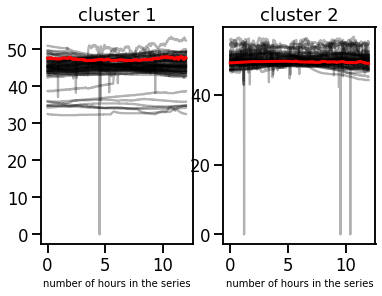

In [8]:
plot(result_soft[2],result_soft[3],result_soft[4],2,0,12,0.01667,result_soft[5])

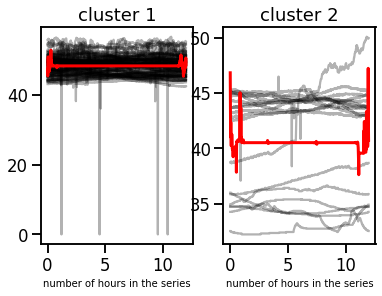

In [9]:
plot(result_dtw[2],result_dtw[3],result_dtw[4],2,0,12,0.01667,result_dtw[5])

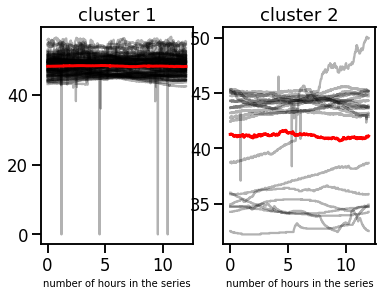

In [10]:
plot(result_euclidean[2],result_euclidean[3],result_euclidean[4],2,0,12,0.01667,result_euclidean[5])

In [5]:
# compute ground truth for anomaly detection task
anomaly = df1['machine_status'].copy()
anomaly.replace({"RECOVERING": 1}, inplace=True)
anomaly.replace({"BROKEN": 1}, inplace=True)
anomaly.replace({"NORMAL": 0}, inplace=True)

In [6]:
# create a dataframe 
z_score_anomalies=pd.DataFrame(data=None, columns=df1.columns[0:49],index=df1.index[131040:131040+40320])

In [ ]:
# for each sensor of interest retrain the model 4 times, for a total prediction horizon of 28 days.
for i in range(49):
    print(df1.iloc[:,i].name)
    #pandas dataframe
    result=dynamicbaseline(df1.iloc[:,i],131040,10080,anomaly)
    z_score_anomalies[[z_score_anomalies.columns[i]]]=result.values

In [16]:
z_score_anomalies['labels']=anomaly.iloc[131040:131040+1440*28]

In [17]:
z_score_anomalies

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
timestamp                                                                    
2018-07-01 00:00:00  -4.854536  -4.764829        0.0  -3.306567  -5.565099   
2018-07-01 00:01:00   0.000000   0.000000        0.0   0.000000   0.000000   
2018-07-01 00:02:00   0.000000   0.000000        0.0   0.000000   0.000000   
2018-07-01 00:03:00   0.000000   0.000000        0.0   0.000000   0.000000   
2018-07-01 00:04:00   0.000000   0.000000        0.0   0.000000   0.000000   
...                        ...        ...        ...        ...        ...   
2018-07-28 23:55:00   0.000000   0.000000        0.0   0.000000   0.000000   
2018-07-28 23:56:00   0.000000   0.000000        0.0   0.000000   0.000000   
2018-07-28 23:57:00   0.000000   0.000000        0.0   0.000000   0.000000   
2018-07-28 23:58:00   0.000000   0.000000        0.0   0.000000   0.000000   
2018-07-28 23:59:00   0.000000   0.000000        0.0   0.000000   0.000000   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
timestamp                                                                    
2018-07-01 00:00:00        0.0  -4.701131  -4.655263  -4.413875        0.0   
2018-07-01 00:01:00        0.0   0.000000   0.000000   0.000000        0.0   
2018-07-01 00:02:00        0.0   0.000000   0.000000   0.000000        0.0   
2018-07-01 00:03:00        0.0   0.000000   0.000000   0.000000        0.0   
2018-07-01 00:04:00        0.0   0.000000   0.000000   0.000000        0.0   
...                        ...        ...        ...        ...        ...   
2018-07-28 23:55:00        0.0   0.000000   0.000000   0.000000        0.0   
2018-07-28 23:56:00        0.0   0.000000   0.000000   0.000000        0.0   
2018-07-28 23:57:00        0.0   0.000000   0.000000   0.000000        0.0   
2018-07-28 23:58:00        0.0   0.000000   0.000000   0.000000        0.0   
2018-07-28 23:59:00        0.0   0.000000   0.000000   0.000000        0.0   

                     ...  sensor_41  sensor_42  sensor_43  sensor_44  \
timestamp            ...                                               
2018-07-01 00:00:00  ...        0.0        0.0        0.0        0.0   
2018-07-01 00:01:00  ...        0.0        0.0        0.0        0.0   
2018-07-01 00:02:00  ...        0.0        0.0        0.0        0.0   
2018-07-01 00:03:00  ...        0.0        0.0        0.0        0.0   
2018-07-01 00:04:00  ...        0.0        0.0        0.0        0.0   
...                  ...        ...        ...        ...        ...   
2018-07-28 23:55:00  ...        0.0        0.0        0.0        0.0   
2018-07-28 23:56:00  ...        0.0        0.0        0.0        0.0   
2018-07-28 23:57:00  ...        0.0        0.0        0.0        0.0   
2018-07-28 23:58:00  ...        0.0        0.0        0.0        0.0   
2018-07-28 23:59:00  ...        0.0        0.0        0.0        0.0   

                     sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
timestamp                                                                    
2018-07-01 00:00:00        0.0        0.0        0.0        0.0        0.0   
2018-07-01 00:01:00        0.0        0.0        0.0        0.0        0.0   
2018-07-01 00:02:00        0.0        0.0        0.0        0.0        0.0   
2018-07-01 00:03:00        0.0        0.0        0.0        0.0        0.0   
2018-07-01 00:04:00        0.0        0.0        0.0        0.0        0.0   
...                        ...        ...        ...        ...        ...   
2018-07-28 23:55:00        0.0        0.0        0.0        0.0        0.0   
2018-07-28 23:56:00        0.0        0.0        0.0        0.0        0.0   
2018-07-28 23:57:00        0.0        0.0        0.0        0.0        0.0   
2018-07-28 23:58:00        0.0        0.0        0.0        0.0        0.0   
2018-07-28 23:59:00        0.0        0.0        0.0        0.0        0.0   

                     labels  
timestamp

In [18]:
# save result in a csv file. 
z_score_anomalies.to_csv('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/pump-sensor-data/dynamicbaselineresult.csv',sep=',')

In [8]:
z_score_anomalies=pd.DataFrame(data=None, columns=df1.columns[0:49],index=df1.index[131040:131040+40320])

In [9]:
# for each sensor of interest retrain the model 4 times, for a total prediction horizon of 28 days.
for i in range(49):
    print(df1.iloc[:,i].name)
    #pandas dataframe
    result=prophetAD(df1.iloc[:,i],131040,10080,40320,anomaly)
    z_score_anomalies[[z_score_anomalies.columns[i]]]=result.values

sensor_00
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.6667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.4078 achieves F1=0.6667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.2530 achieves F1=0.6667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.2733 achieves F1=0.5714.


sensor_01
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.0831 achieves F1=0.0211.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.3261 achieves F1=0.1111.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.3759 achieves F1=0.0909.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.1532 achieves F1=0.0500.


sensor_02
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.0372 achieves F1=0.0385.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.0614 achieves F1=0.1250.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.0644 achieves F1=0.2857.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.0661 achieves F1=0.1429.


sensor_03
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7632 achieves F1=0.1538.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7632 achieves F1=0.1818.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.1538.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7632 achieves F1=0.1667.


sensor_04
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 1.3816 achieves F1=0.0068.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.3333.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.4444.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.5000.


sensor_05
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=1.0000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=1.0000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=1.0000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.8000.


sensor_06
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 4.1448 achieves F1=1.0000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 4.1448 achieves F1=1.0000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6843 achieves F1=0.8000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 4.1448 achieves F1=0.8000.


sensor_07
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=1.0000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=1.0000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.8000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.8000.


sensor_08
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=1.0000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=1.0000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.8000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.5714.


sensor_09
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.4000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 4.1448 achieves F1=0.6667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.6667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.5714.


sensor_10
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 1.9852 achieves F1=0.0090.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.0813 achieves F1=0.0145.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.4000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.3333.


sensor_11
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.2222.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7632 achieves F1=0.1667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.4000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.4000.


sensor_12
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 1.2840 achieves F1=0.0069.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 1.3816 achieves F1=0.0084.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6843 achieves F1=0.6667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6843 achieves F1=0.5000.


sensor_13
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 0.4605 achieves F1=0.0069.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 0.4605 achieves F1=0.0077.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6843 achieves F1=0.6667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6843 achieves F1=0.5000.


sensor_14
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7632 achieves F1=0.1429.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.1429.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.1538.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.1538.


sensor_16
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7632 achieves F1=0.1333.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.3027 achieves F1=0.1176.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7632 achieves F1=0.1250.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7632 achieves F1=0.1111.


sensor_17
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.1667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.8728 achieves F1=0.1667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.8824 achieves F1=0.1538.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7632 achieves F1=0.2000.


sensor_18
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.2000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.2000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.1667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.2222.


sensor_19
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7632 achieves F1=0.1818.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.2222.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7632 achieves F1=0.1818.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.8554 achieves F1=0.1667.


sensor_20
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.4148 achieves F1=0.2222.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.3967 achieves F1=0.2222.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.4266 achieves F1=0.2000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.4190 achieves F1=0.1818.


sensor_21
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.3027 achieves F1=0.1667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.3027 achieves F1=0.2222.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.4163 achieves F1=0.2000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.3027 achieves F1=0.1818.


sensor_22
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.2500.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.2500.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.2000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.2000.


sensor_23
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.2222.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.2222.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.2000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.1818.


sensor_24
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7632 achieves F1=0.1667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.8700 achieves F1=0.2000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7841 achieves F1=0.1667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.9261 achieves F1=0.1538.


sensor_25
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.2222.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.2000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.1818.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.1667.


sensor_26
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.2222.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.2222.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.2000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.1667.


sensor_27
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6843 achieves F1=0.5000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6843 achieves F1=0.4000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6843 achieves F1=0.2857.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6843 achieves F1=0.4000.


sensor_28
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.1818.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.1818.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.1538.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7632 achieves F1=0.1250.


sensor_29
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7863 achieves F1=0.1538.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.8010 achieves F1=0.1818.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7632 achieves F1=0.2000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7632 achieves F1=0.1176.


sensor_30
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.2857.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.2857.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.2857.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.1818.


sensor_31
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7632 achieves F1=0.1053.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.3550 achieves F1=0.0800.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.3859 achieves F1=0.0909.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.8972 achieves F1=0.1538.


sensor_32
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 4.1448 achieves F1=0.5000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 4.1448 achieves F1=0.6667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 4.1448 achieves F1=0.6667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 4.1448 achieves F1=0.5000.


sensor_33
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 4.1448 achieves F1=1.0000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 4.1448 achieves F1=1.0000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 4.1448 achieves F1=0.6667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 4.1448 achieves F1=0.5000.


sensor_34
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 1.9836 achieves F1=0.0095.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7632 achieves F1=0.2000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.2222.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.2222.


sensor_35
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6843 achieves F1=0.5000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.3333.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.3333.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6843 achieves F1=0.4000.


sensor_36
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.2857.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.3333.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.2857.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.2500.


sensor_37
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.0541.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.0769.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6928 achieves F1=0.2500.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.1000.


sensor_38
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 0.4605 achieves F1=0.0065.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 1.3816 achieves F1=0.0081.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7666 achieves F1=0.0444.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7632 achieves F1=0.0526.


sensor_39
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 0.9211 achieves F1=0.0066.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6843 achieves F1=0.6667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2552 achieves F1=0.5714.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.6667.


sensor_40
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 1.6541 achieves F1=0.0078.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 1.9648 achieves F1=0.0111.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 1.9704 achieves F1=0.0219.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 1.9688 achieves F1=0.0222.


sensor_41
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 1.3816 achieves F1=0.0070.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 1.8421 achieves F1=0.0091.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.7632 achieves F1=0.0606.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.5954 achieves F1=0.0513.


sensor_42
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 1.9973 achieves F1=0.0081.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6843 achieves F1=0.5000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 4.1448 achieves F1=0.6667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.5000.


sensor_43
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.4682 achieves F1=0.0250.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2472 achieves F1=0.1667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2471 achieves F1=0.1667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.3069 achieves F1=0.1667.


sensor_44
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6875 achieves F1=0.1111.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6843 achieves F1=0.1176.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6921 achieves F1=0.2667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6843 achieves F1=0.1111.


sensor_45
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.3070 achieves F1=0.0339.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.3479 achieves F1=0.0345.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.3696 achieves F1=0.0370.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.3027 achieves F1=0.0351.


sensor_46
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 1.3816 achieves F1=0.0078.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.2505 achieves F1=0.0267.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 2.2142 achieves F1=0.0548.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 1.9666 achieves F1=0.0296.


sensor_47
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6843 achieves F1=0.3333.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6843 achieves F1=0.4000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.1176.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.0000 achieves F1=0.1538.


sensor_48
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 0.4605 achieves F1=0.0065.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 0.4605 achieves F1=0.0076.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 4.1448 achieves F1=0.5000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 4.1448 achieves F1=0.6667.


sensor_49
Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 4.1448 achieves F1=0.5000.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 4.1448 achieves F1=0.6667.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.2237 achieves F1=0.3333.


Training ProphetDetector...


INFO:merlion.post_process.threshold:Threshold 3.6843 achieves F1=0.4000.


In [10]:
z_score_anomalies['labels']=anomaly.iloc[131040:131040+1440*28]

In [12]:
# save result in a csv file. 
z_score_anomalies.to_csv('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/pump-sensor-data/prophetresult.csv',sep=',')